# NCEI Paleo Database API

## About

The NCEI Paleo Web Service is searchable via its web interface:[https://www.ncei.noaa.gov/access/paleo-search/](https://www.ncei.noaa.gov/access/paleo-search/) 

Here we are using its API: [https://www.ncei.noaa.gov/access/paleo-search/api](https://www.ncei.noaa.gov/access/paleo-search/api)

Specifically, we are interested in Tree Ring Data




## Tutorial 1: Using Python to access the API for tree ring `.rwl` data

### Step 1: Activate/Create a Python environment

First, you need to import the necessary libraries in Python. The most common ones used for API calls are `requests` for making HTTP requests and `json` for handling JSON data.

We also want to plot the data using `maplotlib`, `numpy`, and `pandas` which are all core libraries for scientific Python.

Later, we will use `fiona` and Leaflet maps to visualize the site locations.

In [77]:
!mamba install -n dplpy -c conda-forge folium tabulate requests -y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['folium', 'tabulate', 'requests']

[+] 0.0s
conda-forge/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B / 

In [78]:
# import Python libraries
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd

### Step 2: Set the base url for the API as `api_base`

Define the base url to the NOAA Paleoclimate API, this URL is the starting point for all future requests.

In [79]:
# Call the NOAA API to get tree ring data 
api_base = "https://www.ncei.noaa.gov/access/paleo-search/study/search.json?"

### Step 3:  Search via API for tree ring (`dataTypeID=18`) studies of raw ring width. 

Returns pages of 10 studies at a time. Set this limit to avoid overwhelming the API with large requests.

Results are returned in JSON format as a dict called "data". 

Note, when searching via the user interface, the API call used to retrieve results is displayed immediately above the search results and can be used to generate a "req_str" relevant to the use case.

In [80]:

# build the request string for the API 
# data type is tree ring data (18), species is ponderosa pine (PIPO), limit to 5 records
# to limit the results to headersOnly, set headersOnly to true
req_params ="dataPublisher=NOAA&dataTypeId=18&species=PIPO&limit=5&headersOnly=true"
req_str = api_base + req_params

# make the request
response = requests.get(req_str)

# Convert the response to JSON
data = response.json()

# Pretty-print the JSON data to debug
print(json.dumps(data, indent=4))

{
    "study": [
        {
            "xmlId": "64380",
            "NOAAStudyId": "26070",
            "studyName": "Azpeleta Taranc\u00f3n fire data from Mistletoe Canyon, south central New Mexico - IMPD USMC-001",
            "dataPublisher": "NOAA",
            "dataType": "FIRE HISTORY",
            "investigators": "Azpeleta Taranc\u00f3n, A.; Fule, P.Z.; S\u00e1nchez Meador, A.J.; Kim, Y.-S.; Padilla, T.",
            "onlineResourceLink": "https://www.ncei.noaa.gov/access/paleo-search/study/26070",
            "primaryInvestigator": "Azpeleta Taranc\u00f3n, A.",
            "reconstruction": "N",
            "contributionDate": "2019-02-04"
        },
        {
            "xmlId": "64375",
            "NOAAStudyId": "26071",
            "studyName": "Azpeleta Taranc\u00f3n fire data from Potato Patch NM, south central New Mexico - IMPD USPP-002",
            "dataPublisher": "NOAA",
            "dataType": "FIRE HISTORY",
            "investigators": "Azpeleta Taranc\u00f3n, 

We want to view the data here, so we use `pandas` to create a DataFrame and then print it in a MarkDown format



In [81]:
# Convert the 'study' data to a pandas DataFrame
df = pd.DataFrame(data['study'])
# view the data as markdown

print(df.to_markdown())
# export the markdown dataframe as rendered text
with open('tree-ring-data.md', 'w') as f:
    f.write(df.to_markdown())

# view the markdown file in notebook as a new MarkDown cell


|    |   xmlId |   NOAAStudyId | studyName                                                                                   | dataPublisher   | dataType     | investigators                                                                    | onlineResourceLink                                        | primaryInvestigator   | reconstruction   | contributionDate   |
|---:|--------:|--------------:|:--------------------------------------------------------------------------------------------|:----------------|:-------------|:---------------------------------------------------------------------------------|:----------------------------------------------------------|:----------------------|:-----------------|:-------------------|
|  0 |   64380 |         26070 | Azpeleta Tarancón fire data from Mistletoe Canyon, south central New Mexico - IMPD USMC-001 | NOAA            | FIRE HISTORY | Azpeleta Tarancón, A.; Fule, P.Z.; Sánchez Meador, A.J.; Kim, Y.-S.; Padilla, T. | https://www.ncei.noaa.g

#### Request the entire JSON response

Now that we have previewed the API and are satisfied with the response, we are going to re-run the code from above, but this time, we want the entire response, not just the headers. 

Also, we are going to increase our `limit` request from `limit=10` to `limit=500` sites. 

**Note: we have removed `&headersOnly=true` from our `req_params`, the `api_base` request is unchanged.**

In [82]:
# rebuild the request string for the API 
# data type is tree ring data (18), species is ponderosa pine (PIPO), limit to 500 records
# to limit the results to headersOnly, set headersOnly to true
req_params ="dataPublisher=NOAA&dataTypeId=18&species=PIPO&limit=500"
req_str = api_base + req_params

# make the request
response = requests.get(req_str)

# Convert the response to JSON
data = response.json()

## Viewing the API output on a map

### Step 4: install Python library `folium`

We need to install `folium` maps and its required dependencies into our Python environment. This can be done by using an `environment.yml` (see provided example), or by installing on the fly using `conda`, `mamba`, or `pip`

`mamba install -c conda-forge folium`

### Step 5: Plot the locations of the API results on an interactive map

Create a base folium map, in our example we are zoomed in and centered over North America.

Next, we call the JSON `data` response from the API.

The JSON contains the `geo` geometric coordinates of the study area and its point location

In the map, we are tagging the `doi`, the Site Name and Site ID.

Optionally, if the file has a `.rwl`, a `.pdf`, or `.png` fire history figure associated with it, we provide a hyperlink.

On Mac OS X, press the command button ⌘ and click on the hyperlink to open in your browser. 

If you click the link directly it may open in the Notebook widget. To go back, just re-run the notebook cell

In [83]:
# import packages for Leaflet
import folium

# Create a folium Map centered on the United States
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Assuming that 'data' is your response data
for study in data['study']:
    for site in study['site']:
        lat = float(site['geo']['geometry']['coordinates'][0])
        lon = float(site['geo']['geometry']['coordinates'][1])
        # Create a popup with the site name
        popup_text = f"<a href='{study['doi']}'>url: {study['doi']}</a><br><a>Site Name: </a>{site['siteName']}<br><a>Site ID: </a>{site['NOAASiteId']}<br></a>"
        
        # Add links to any rwl files
        for file in site['paleoData'][0]['dataFile']:
            link = file['fileUrl']
            if link.endswith('.rwl'):
                # click to copy the URL to the clipboard
                popup_text += f"<br><a href='{link}'>view rwl file</a>"
                
        # Add links to any csv files
        for file in site['paleoData'][0]['dataFile']:
            link = file['fileUrl']
            if link.endswith('.csv'):
                popup_text += f"<br><a href='{link}'>Link to csv file</a>"
        
        # Add links to any PDF files
        for file in site['paleoData'][0]['dataFile']:
            link = file['fileUrl']
            if link.endswith('.pdf'):
                popup_text += f"<br><a href='{link}'>Link to PDF file</a>"
        
        # Add links to any figure files
        for file in site['paleoData'][0]['dataFile']:
            link = file['fileUrl']
            if link.endswith('.png'):
                popup_text += f"<br><a href='{link}'>Link to figure file</a>"
        
        popup = folium.Popup(popup_text, max_width=250)
        folium.Marker([lat, lon], popup=popup).add_to(m)

# Display the Map
m

### Saving the Map for later use

Below is a script to save the map as `.html` to your computer 

In [85]:
from datetime import datetime
save_map = input("Do you want to save the map.html locally? (y/n): ")
if save_map == 'y':
    # ask what name to save the map as
    map_name = input("What do you want to name the map? ")
    m.save(f'map_{map_name}.html')
    # if nothing entered
    if map_name == '':
        # Get the current date and time
        now = datetime.now()
        # Format the date and time as a string
        map_name = now.strftime("%Y%m%d_%H%M%S")
        # Use the timestamp in the filename
        m.save(f'map_{map_name}.html')
else:
    print('not saved')

Do you want to save the map.html locally? (y/n):  n


not saved


### Step 7: Download the `.rwl` for a selected site using the `siteID`



In [86]:
# download a .rwl file directly from ITRDB website

import requests

def download_rwl_file(url, file_path):
    """
    Download a .rwl file from a given URL and save it locally.

    :param url: URL of the .rwl file
    :param file_path: Local path to save the file
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful

        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded successfully: {file_path}")
    except requests.RequestException as e:
        print(f"Error downloading the file: {e}")

In [87]:
# Example Usage
url = "https://www.ncei.noaa.gov/pub/data/paleo/treering/measurements/northamerica/usa/az547.rwl"
file_path = "az547.rwl"  # Replace with your desired path
download_rwl_file(url, file_path)

File downloaded successfully: az547.rwl


In [88]:
import os
import dplpy as dpl

# set the working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/jovyan/data-store


In [89]:
help(dpl.readers)

Help on function readers in module readers:

readers(filename: str, skip_lines=0, header=False)
    Imports a common ring width data file

    Extended Summary
    ----------------
    This function imports common ring width data files (.csv, .rwls) as arrays

    Parameters
    ----------
    filename : str
               a data file (.CSV or .RWL) or a pandas dataframe imported from dpl.readers().

    Returns
    -------
    data : pandas dataframe

    Examples
    --------
    >>> import dplpy as dpl
    >>> data = dpl.readers("../tests/data/csv/file.csv")
    >>> data = dpl.readers("../tests/data/csv/file.rwl", header=True)

    References
    ----------
    .. [1] https:/opendendro.org/dplpy-man/#readers



In [90]:
data = dpl.readers("/home/jovyan/data-store/az547.rwl", header=True)


Attempting to read input file: az547.rwl as .rwl format


SUCCESS!
File read as: .rwl file

Series names:
['WCP011', 'WCP012', 'WCP021', 'WCP022', 'WCP031', 'WCP032', 'WCP041', 'WCP042', 'WCP051', 'WCP052', 'WCP061', 'WCP062', 'WCP071', 'WCP072', 'WCP081', 'WCP082', 'WCP091', 'WCP092', 'WCP101', 'WCP111', 'WCP112'] 



In [91]:
dpl.summary(data)

,WCP011,WCP012,WCP021,WCP022,WCP031,WCP032,WCP041,WCP042,WCP051,WCP052,...,WCP062,WCP071,WCP072,WCP081,WCP082,WCP091,WCP092,WCP101,WCP111,WCP112
count,367.000000,387.000000,574.000000,568.000000,270.000000,268.000000,377.000000,378.000000,378.000000,379.000000,...,460.000000,367.000000,368.000000,310.000000,308.000000,308.000000,305.000000,371.000000,366.000000,383.000000
mean,0.889591,1.119612,0.569948,0.518486,1.027111,1.139478,0.982414,0.948386,0.830873,0.875831,...,0.583478,0.946322,1.052201,1.117097,1.098019,1.198247,1.120295,0.842911,1.006284,1.016345
std,0.726893,0.782691,0.460331,0.313141,0.834130,0.826676,0.970882,0.694060,0.801188,0.618304,...,0.613571,0.687315,0.749256,0.564160,0.652438,0.748183,0.707423,0.870879,0.690556,0.665793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.020000,0.050000,0.130000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.620000,0.282500,0.307500,0.420000,0.517500,0.380000,0.472500,0.320000,0.465000,...,0.170000,0.440000,0.430000,0.660000,0.557500,0.657500,0.640000,0.190000,0.530000,0.545000
50%,0.670000,0.930000,0.480000,0.470000,0.705000,0.830000,0.640000,0.795000,0.540000,0.730000,...,0.385000,0.690000,0.780000,0.980000,0.960000,0.955000,0.890000,0.360000,0.840000,0.870000
75%,1.160000,1.380000,0.750000,0.690000,1.455000,1.672500,1.320000,1.227500,1.080000,1.035000,...,0.762500,1.220000,1.542500,1.537500,1.592500,1.597500,1.380000,1.350000,1.267500,1.300000
max,3.450000,4.480000,4.870000,2.040000,4.150000,3.840000,5.760000,3.800000,3.760000,3.210000,...,3.300000,3.100000,3.250000,3.250000,2.910000,3.530000,3.740000,3.670000,3.780000,4.350000


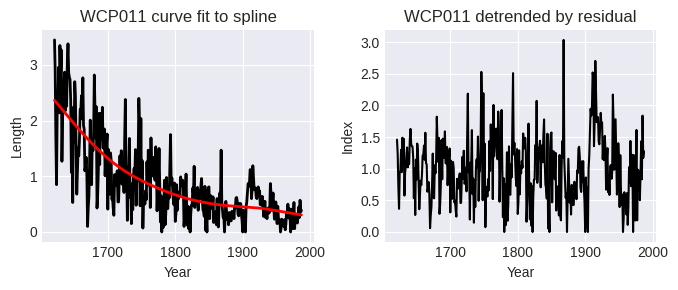

1621    1.458716
1622    1.233723
1623    0.719140
1624    0.366121
1625    0.944886
          ...   
1983    1.431906
1984    0.832821
1985    1.838013
1986    1.168667
1987    1.274638
Name: WCP011, Length: 367, dtype: float64

In [92]:
dpl.detrend(data["WCP011"])

In [93]:
dpl.autoreg(data["WCP011"], 20)

const         0.058818
WCP011.L1     0.370037
WCP011.L2     0.270136
WCP011.L3    -0.047990
WCP011.L4     0.016080
WCP011.L5    -0.009716
WCP011.L6     0.107719
WCP011.L7    -0.028582
WCP011.L8    -0.003267
WCP011.L9     0.065848
WCP011.L10   -0.072174
WCP011.L11   -0.035382
WCP011.L12    0.096421
WCP011.L13    0.031105
WCP011.L14   -0.046085
WCP011.L15    0.132907
WCP011.L16    0.034036
WCP011.L17   -0.135831
WCP011.L18    0.149418
dtype: float64

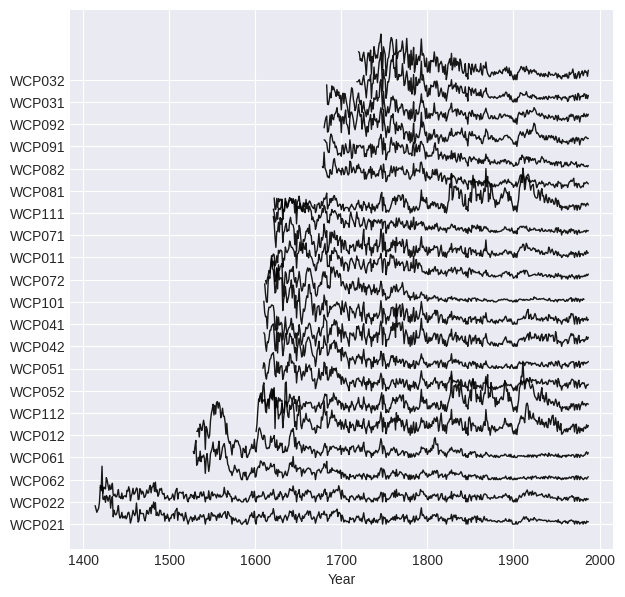

In [94]:
dpl.plot(data,type="spag")

In [ ]:
dpl.xdate(data, prewhiten=True, corr="Spearman", slide_period=50,bin_floor=100, p_val=0.05, show_flags=True)

Flags for WCP022
[B] Segment  High   -10    -9    -8    -7    -6    -5    -4    -3    -2    -1     0    +1    +2    +3    +4    +5    +6    +7    +8    +9   +10
   1525-1574   -6 -0.05  0.07 -0.14 -0.00  0.38  0.00 -0.29  0.05  0.16  0.13  0.27  0.05 -0.35 -0.01  0.01 -0.05  0.05 -0.14  0.02 -0.24  0.08



In [ ]:
dpl.xdate_plot(data)

In [ ]:
df_rwi = dpl.detrend(data, fit="spline", period=50, method="residual", plot=True)
